<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project - An Automated System for Accident Severity

> Author: Irfan Muzafar (DSI-42)
---

**Problem Statement:**  
How can we develop an automated system capable of analysing images from traffic cameras or phone cameras to classify accidents into five severity classes accurately?

**Target Audience:** <br>
Land Transport Authority (LTA) board members

**References:** <br>  
- [What to do right after a traffic accident](https://singaporelegaladvice.com/law-articles/what-to-do-in-a-traffic-accident/)
- [Singapore Civil Defence Force (SCDF) Emergency Medical Services](https://www.scdf.gov.sg/home/about-us/information-on-ems/scdf-emergency-medical-services)
- [Expressway Monitoring Advisory System (EMAS)](https://www.lta.gov.sg/content/ltagov/en/getting_around/driving_in_singapore/intelligent_transport_systems/expressway_monitoring_advisory_system.html)
- [Traffic Cameras on Expressways](https://onemotoring.lta.gov.sg/content/onemotoring/home/driving/traffic_information/traffic-cameras.html)
- [Two types of Towing Services by EMAS Recovery](https://emas.sg/car-towing-services)
- [Types of Emergency Vehicles by SCDF](https://www.scdf.gov.sg/home/about-us/information-on-ems/scdf-emergency-medical-services)

**Summary:**
- Right after a traffic accident occurs, we should first check if all parties involved are injured. If anyone is in need of emergency medical attention, call 995 immediately.
- If the accident is on an expressway, the EMAS vehicle recovery tow truck and LTA Traffic Marshal work together to clear an accident and bring traffic flow back to normal as quickly as possible. Real-time footage of traffic conditions at specific locations on expressways can be viewed on the One Motoring website.
- If the accident cannot be seen via a traffic camera, it is difficult to ascertain how severe the accident is. LTA officer deploys a recovery crew with tow trucks to the scene, with a chance of overdeploying or underdeploying. 
- The officer has to decide which of the two types of towing services: Wheel Lift Towing vs Flatbed Towing, to deploy.
- In addition, if there is an emergency (fire or severe injury) as a result of the accident, an SCDF officer deploys a crew with fire engine or ambulance to the scene, with a chance of overdeploying or underdeploying.
- The SCDF officer has to decide on the type and the number of emergency vehicles required.
- Thus, they hope to have a system where the affected parties or witnesses can upload images of the accident so that they can assess the situation and deploy resources more efficiently.
- Develop an image classification model to classify accidents into four severity classes.
- Image dataset: [`Car Crash Severity Detection`](https://universe.roboflow.com/ansonlau1325-gmail-com/car-crash-severity-detection/dataset/13)

**Background Information:**
- Dataset: [Singstat Road Traffic Accident Casualties, Annual](https://tablebuilder.singstat.gov.sg/table/TS/M651281)

There are a total of three notebooks for this project:  
 1. `01_Data_Cleaning_EDA.ipynb`   
 2. `02_CNN_Pretrained_Models.ipynb`   
 3. `03_Evaluation_Conclusion.ipynb`

---
**This Notebook**
- We will clean the data for `singstat_acc` dataset.
- Conduct some EDA to gather insights
- Pre-process data for `severity_acc` dataset

# **Part 1 - Data Cleaning & EDA**

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Set a random seed
np.random.seed(42)

# show all columns
pd.set_option('display.max_columns', None)

# 2. Read CSV

In [3]:
# read csv
df = pd.read_csv('../datasets/singstat_acc.csv')

In [4]:
# number of rows and columns
df.shape

(43, 31)

In [5]:
# display first 5 rows
df.head()

,Data Series,Total Casualties Fatalities (Number),Total Casualties Fatalities -> Pedestrians (Number),Total Casualties Fatalities -> Personal Mobility Device Users (Number),Total Casualties Fatalities -> Cyclists & Pillions (Number),Total Casualties Fatalities -> Motor Cyclists & Pillion Riders (Number),Total Casualties Fatalities -> Motor Cars And Station Wagons (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Goods Vans (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Pick-Ups (Number),"Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)",Total Casualties Fatalities -> Buses (Number),Total Casualties Fatalities -> Others (Number),Total Casualties Injured (Number),Total Casualties Injured -> Pedestrians (Number),Total Casualties Injured -> Personal Mobility Device Users (Number),Total Casualties Injured -> Cyclists & Pillions (Number),Total Casualties Injured -> Motor Cyclists & Pillion Riders (Number),Total Casualties Injured -> Motor Cars And Station Wagons (Number),Total Casualties Injured -> Goods Vans & Pick-Ups (Number),Total Casualties Injured -> Goods Vans & Pick-Ups -> Goods Vans (Number),Total Casualties Injured -> Goods Vans & Pick-Ups -> Pick-Ups (Number),"Total Casualties Injured -> Lorries, Tipper Trucks & Trailers (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)",Total Casualties Injured -> Buses (Number),Total Casualties Injured -> Others (Number)
0,2023,136,39,2,14,68,6,3,3,0,2,1,0,1,2,0,8931,849,63,560,4222,2311,239,227,12,477,452,14,11,194,16
1,2022,108,33,0,11,47,6,1,1,0,7,6,1,0,3,0,8441,659,53,724,4229,1949,187,180,7,379,351,12,16,238,23
2,2021,107,23,3,11,50,12,3,3,0,4,4,0,0,1,0,7240,605,46,763,3693,1445,192,181,11,345,321,15,9,128,23
3,2020,83,18,0,7,49,4,2,2,0,3,3,0,0,0,0,6669,642,51,563,3381,1446,163,156,7,243,226,10,7,168,12
4,2019,118,39,2,8,64,1,0,0,0,3,2,1,0,1,0,9833,979,197,452,5010,2289,159,147,12,449,416,20,13,276,22


# 3. Check null values and data types

In [6]:
# check number of null values per column
df.isnull().sum()

Data Series                                                                                   0
Total Casualties Fatalities (Number)                                                          0
Total Casualties Fatalities -> Pedestrians (Number)                                           0
Total Casualties Fatalities -> Personal Mobility Device Users (Number)                        0
Total Casualties Fatalities -> Cyclists & Pillions (Number)                                   0
Total Casualties Fatalities -> Motor Cyclists & Pillion Riders (Number)                       0
Total Casualties Fatalities -> Motor Cars And Station Wagons (Number)                         0
Total Casualties Fatalities -> Goods Vans & Pick-Ups (Number)                                 0
Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Goods Vans (Number)                   0
Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Pick-Ups (Number)                     0
Total Casualties Fatalities -> Lorries, 

**Observation**<br>
There are NO null values in the dataset. From here, lets analyse the data types.

In [7]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 31 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Data Series                                                                                 43 non-null     int64 
 1   Total Casualties Fatalities (Number)                                                        43 non-null     int64 
 2   Total Casualties Fatalities -> Pedestrians (Number)                                         43 non-null     int64 
 3   Total Casualties Fatalities -> Personal Mobility Device Users (Number)                      43 non-null     object
 4   Total Casualties Fatalities -> Cyclists & Pillions (Number)                                 43 non-null     int64 
 5   Total Casualties Fatalities -> Motor Cyclists & Pill

**Observation**<br>
There are some columns that are integers and some columns that are strings. The `Data Series` column is the year (1981 to 2023). We should be expecting all values to be integers because these are the number of fatalities and injuries. Thus we will investigate further by looking at the unique values in column `Total Casualties Fatalities -> Personal Mobility Device Users (Number)`.

In [8]:
# unique values in column
df['Total Casualties Fatalities -> Personal Mobility Device Users (Number)'].unique()

array(['2', '0', '3', '1', '4', 'na'], dtype=object)

We can see that out of the 43 values in that column, there are only 6 unique values, including 'na'. These 'na' values are not captured as null values. For a clearer perspective, we will observe the dataframe as a whole.

In [9]:
# see whole dataframe
df

,Data Series,Total Casualties Fatalities (Number),Total Casualties Fatalities -> Pedestrians (Number),Total Casualties Fatalities -> Personal Mobility Device Users (Number),Total Casualties Fatalities -> Cyclists & Pillions (Number),Total Casualties Fatalities -> Motor Cyclists & Pillion Riders (Number),Total Casualties Fatalities -> Motor Cars And Station Wagons (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Goods Vans (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Pick-Ups (Number),"Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)",Total Casualties Fatalities -> Buses (Number),Total Casualties Fatalities -> Others (Number),Total Casualties Injured (Number),Total Casualties Injured -> Pedestrians (Number),Total Casualties Injured -> Personal Mobility Device Users (Number),Total Casualties Injured -> Cyclists & Pillions (Number),Total Casualties Injured -> Motor Cyclists & Pillion Riders (Number),Total Casualties Injured -> Motor Cars And Station Wagons (Number),Total Casualties Injured -> Goods Vans & Pick-Ups (Number),Total Casualties Injured -> Goods Vans & Pick-Ups -> Goods Vans (Number),Total Casualties Injured -> Goods Vans & Pick-Ups -> Pick-Ups (Number),"Total Casualties Injured -> Lorries, Tipper Trucks & Trailers (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)",Total Casualties Injured -> Buses (Number),Total Casualties Injured -> Others (Number)
0,2023,136,39,2,14,68,6,3,3,0,2,1,0,1,2,0,8931,849,63,560,4222,2311,239,227,12,477,452,14,11,194,16
1,2022,108,33,0,11,47,6,1,1,0,7,6,1,0,3,0,8441,659,53,724,4229,1949,187,180,7,379,351,12,16,238,23
2,2021,107,23,3,11,50,12,3,3,0,4,4,0,0,1,0,7240,605,46,763,3693,1445,192,181,11,345,321,15,9,128,23
3,2020,83,18,0,7,49,4,2,2,0,3,3,0,0,0,0,6669,642,51,563,3381,1446,163,156,7,243,226,10,7,168,12
4,2019,118,39,2,8,64,1,0,0,0,3,2,1,0,1,0,9833,979,197,452,5010,2289,159,147,12,449,416,20,13,276,22
5,2018,124,39,1,9,61,10,3,3,0,1,1,0,0,0,0,10018,877,162,499,4839,2537,180,171,9,547,500,32,15,350,27
6,2017,121,41,4,15,44,9,2,2,0,5,5,0,0,1,0,9953,903,95,589,4803,2485,199,196,3,524,497,21,6,333,22
7,2016,141,47,na,20,62,8,1,1,0,3,2,0,1,0,0,10687,1065,na,594,5102,2698,235,224,11,540,493,32,15,415,38
8,2015,151,43,na,17,72,7,2,2,0,8,7,0,1,2,0,10412,973,na,606,4928,2746,219,203,16,554,514,29,11,358,28
9,2014,155,45,na,15,74,12,2,1,1,6,6,0,0,0,1,9858,883,na,503,4634,2686,193,185,8,578,520,38,20,342,39


**Observations**<br>
- There are 'na' values for Personal Mobility Devices (PMD) before 2017. 
    - Could be due to the lack of usage of PMD before 2017. It was reported that there was a boom in the use of PMD around that time. [Source](https://sgscooters.co/pmd-escooter-events-for-2016-and-2017/)
- All the values in the **injuries columns before 2006** are 'na'.
    - Could be due to the lack of data tracking for injuries before 2006

Due to the lack of data before 2006, we will drop the rows for 1981 to 2005.

In [10]:
# keep data from 2006 to 2023
df = df.iloc[:18,]

# 4. Split into two dataframes

We will analyse the fatalities data and injuries data separately. We will also rename the `Data Series` column as `year` for simplicity.

In [11]:
df_fatal = df[df.columns[:16]] # pick first 16 columns for fatalities
df_fatal = df_fatal.rename(columns={'Data Series': 'year'}) # rename column
df_inj = df[df.columns[16:]] # pick the remaining columns for injuries
df_inj.insert(loc=0, column='year', value=df['Data Series']) # insert the 'year' column at the front

In [12]:
# show first 5 rows of fatalities
df_fatal.head()

,year,Total Casualties Fatalities (Number),Total Casualties Fatalities -> Pedestrians (Number),Total Casualties Fatalities -> Personal Mobility Device Users (Number),Total Casualties Fatalities -> Cyclists & Pillions (Number),Total Casualties Fatalities -> Motor Cyclists & Pillion Riders (Number),Total Casualties Fatalities -> Motor Cars And Station Wagons (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Goods Vans (Number),Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Pick-Ups (Number),"Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)","Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)",Total Casualties Fatalities -> Buses (Number),Total Casualties Fatalities -> Others (Number)
0,2023,136,39,2,14,68,6,3,3,0,2,1,0,1,2,0
1,2022,108,33,0,11,47,6,1,1,0,7,6,1,0,3,0
2,2021,107,23,3,11,50,12,3,3,0,4,4,0,0,1,0
3,2020,83,18,0,7,49,4,2,2,0,3,3,0,0,0,0
4,2019,118,39,2,8,64,1,0,0,0,3,2,1,0,1,0


In [13]:
# show first 5 rows of injuries
df_inj.head()

,year,Total Casualties Injured (Number),Total Casualties Injured -> Pedestrians (Number),Total Casualties Injured -> Personal Mobility Device Users (Number),Total Casualties Injured -> Cyclists & Pillions (Number),Total Casualties Injured -> Motor Cyclists & Pillion Riders (Number),Total Casualties Injured -> Motor Cars And Station Wagons (Number),Total Casualties Injured -> Goods Vans & Pick-Ups (Number),Total Casualties Injured -> Goods Vans & Pick-Ups -> Goods Vans (Number),Total Casualties Injured -> Goods Vans & Pick-Ups -> Pick-Ups (Number),"Total Casualties Injured -> Lorries, Tipper Trucks & Trailers (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)","Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)",Total Casualties Injured -> Buses (Number),Total Casualties Injured -> Others (Number)
0,2023,8931,849,63,560,4222,2311,239,227,12,477,452,14,11,194,16
1,2022,8441,659,53,724,4229,1949,187,180,7,379,351,12,16,238,23
2,2021,7240,605,46,763,3693,1445,192,181,11,345,321,15,9,128,23
3,2020,6669,642,51,563,3381,1446,163,156,7,243,226,10,7,168,12
4,2019,9833,979,197,452,5010,2289,159,147,12,449,416,20,13,276,22


# 5. Rename columns

We will rename the columns to a shorter name for simple data handling, and remove columns that we will not use for analysis.

In [14]:
# rename columns using dictionary
df_fatal = df_fatal.rename(columns={'Total Casualties Fatalities (Number)': 'total',
                                    'Total Casualties Fatalities -> Pedestrians (Number)': 'pedestrians',
                                    'Total Casualties Fatalities -> Personal Mobility Device Users (Number)': 'pmd_users',
                                    'Total Casualties Fatalities -> Cyclists & Pillions (Number)': 'cyclists_pillions',
                                    'Total Casualties Fatalities -> Motor Cyclists & Pillion Riders (Number)': 'mcyclists_pillions',
                                    'Total Casualties Fatalities -> Motor Cars And Station Wagons (Number)': 'cars',
                                    'Total Casualties Fatalities -> Goods Vans & Pick-Ups (Number)': 'goodsvans_pickups',
                                    'Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers (Number)': 'lorries_trucks_trailers',
                                    'Total Casualties Fatalities -> Buses (Number)': 'buses',
                                    'Total Casualties Fatalities -> Others (Number)': 'others'})

In [15]:
# drop redundant columns
df_fatal.drop(columns=['Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Goods Vans (Number)',
                       'Total Casualties Fatalities -> Goods Vans & Pick-Ups -> Pick-Ups (Number)',
                       'Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)',
                       'Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)',
                       'Total Casualties Fatalities -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)'],
                       inplace=True)

In [16]:
# rename columns using dictionary
df_inj = df_inj.rename(columns={'Total Casualties Injured (Number)': 'total',
                                'Total Casualties Injured -> Pedestrians (Number)': 'pedestrians',
                                'Total Casualties Injured -> Personal Mobility Device Users (Number)': 'pmd_users',
                                'Total Casualties Injured -> Cyclists & Pillions (Number)': 'cyclists_pillions',
                                'Total Casualties Injured -> Motor Cyclists & Pillion Riders (Number)': 'mcyclists_pillions',
                                'Total Casualties Injured -> Motor Cars And Station Wagons (Number)': 'cars',
                                'Total Casualties Injured -> Goods Vans & Pick-Ups (Number)': 'goodsvans_pickups',
                                'Total Casualties Injured -> Lorries, Tipper Trucks & Trailers (Number)': 'lorries_trucks_trailers',
                                'Total Casualties Injured -> Buses (Number)': 'buses',
                                'Total Casualties Injured -> Others (Number)': 'others'})

In [17]:
# drop redundant columns
df_inj.drop(columns=['Total Casualties Injured -> Goods Vans & Pick-Ups -> Goods Vans (Number)',
                       'Total Casualties Injured -> Goods Vans & Pick-Ups -> Pick-Ups (Number)',
                       'Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Lorries (Number)',
                       'Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Tipper Trucks (Number)',
                       'Total Casualties Injured -> Lorries, Tipper Trucks & Trailers -> Trailers (Number)'],
                       inplace=True)

In [18]:
# show first 5 rows of fatalities
df_fatal.head()

,year,total,pedestrians,pmd_users,cyclists_pillions,mcyclists_pillions,cars,goodsvans_pickups,lorries_trucks_trailers,buses,others
0,2023,136,39,2,14,68,6,3,2,2,0
1,2022,108,33,0,11,47,6,1,7,3,0
2,2021,107,23,3,11,50,12,3,4,1,0
3,2020,83,18,0,7,49,4,2,3,0,0
4,2019,118,39,2,8,64,1,0,3,1,0


In [19]:
# show first 5 rows of injuries
df_inj.head()

,year,total,pedestrians,pmd_users,cyclists_pillions,mcyclists_pillions,cars,goodsvans_pickups,lorries_trucks_trailers,buses,others
0,2023,8931,849,63,560,4222,2311,239,477,194,16
1,2022,8441,659,53,724,4229,1949,187,379,238,23
2,2021,7240,605,46,763,3693,1445,192,345,128,23
3,2020,6669,642,51,563,3381,1446,163,243,168,12
4,2019,9833,979,197,452,5010,2289,159,449,276,22


Now the data looks cleaner, for both `df_fatal` and `df_inj`. We will check the datatypes again, firstly for the fatalities dataframe.

In [20]:
# see datatypes
df_fatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     18 non-null     int64 
 1   total                    18 non-null     int64 
 2   pedestrians              18 non-null     int64 
 3   pmd_users                18 non-null     object
 4   cyclists_pillions        18 non-null     int64 
 5   mcyclists_pillions       18 non-null     int64 
 6   cars                     18 non-null     int64 
 7   goodsvans_pickups        18 non-null     int64 
 8   lorries_trucks_trailers  18 non-null     int64 
 9   buses                    18 non-null     int64 
 10  others                   18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


There are 'na' values in pmd_users. We will fill the 'na' values with 0, since we do not have information on those values. Then change datatype to integer.

In [21]:
# convert object to int
df_fatal.loc[df_fatal['pmd_users'] == 'na', 'pmd_users'] = 0
# change datatype
df_fatal['pmd_users'] = df_fatal['pmd_users'].astype(int)

Next we look at the injuries dataframe.

In [22]:
# see datatypes
df_inj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     18 non-null     int64 
 1   total                    18 non-null     object
 2   pedestrians              18 non-null     object
 3   pmd_users                18 non-null     object
 4   cyclists_pillions        18 non-null     object
 5   mcyclists_pillions       18 non-null     object
 6   cars                     18 non-null     object
 7   goodsvans_pickups        18 non-null     object
 8   lorries_trucks_trailers  18 non-null     object
 9   buses                    18 non-null     object
 10  others                   18 non-null     object
dtypes: int64(1), object(10)
memory usage: 1.7+ KB


There are 'na' values in pmd_users. We will fill the 'na' values with 0, since we do not know the information on those values. Then change datatypes for all the columns to integer.

In [23]:
# convert object to int
df_inj.loc[df_inj['pmd_users'] == 'na', 'pmd_users'] = 0
# change datatypes
df_inj = df_inj.astype(int)

Now all the columns are in integer datatype, we can proceed with our exploratory data analysis.

# 6. Exploratory Data Analysis

In this section, we will conduct some exploration plots for the context of our problem statement.

In [24]:
# summary statistics for fatalities
df_fatal.describe()

,year,total,pedestrians,pmd_users,cyclists_pillions,mcyclists_pillions,cars,goodsvans_pickups,lorries_trucks_trailers,buses,others
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,153.777778,42.500000,0.666667,14.666667,74.000000,11.555556,2.055556,6.388889,1.333333,0.611111
std,5.338539,39.714504,10.749829,1.236694,4.297742,20.559812,5.833193,1.392088,3.550292,1.188177,1.334558
min,2006.000000,83.000000,18.000000,0.000000,7.000000,44.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2010.250000,121.750000,39.000000,0.000000,11.750000,61.250000,7.250000,1.000000,3.250000,0.250000,0.000000
50%,2014.500000,153.000000,43.000000,0.000000,15.000000,72.500000,12.000000,2.000000,6.500000,1.000000,0.000000
75%,2018.750000,188.250000,46.500000,0.750000,16.750000,91.250000,14.750000,3.000000,8.750000,2.000000,0.750000
max,2023.000000,221.000000,62.000000,4.000000,22.000000,108.000000,23.000000,5.000000,15.000000,4.000000,5.000000


From the summary statistics of `df_fatal` above, we observe that in the last 18 years, the average number of fatalities is 153. Also, the columns with high mean fatality numbers are `pedestrians`, `mcyclists_pillions` and `cars` with 42.5, 74 and 11.5 respectively.

In [25]:
# summary statistics for injuries
df_inj.describe()

,year,total,pedestrians,pmd_users,cyclists_pillions,mcyclists_pillions,cars,goodsvans_pickups,lorries_trucks_trailers,buses,others
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,9760.500000,930.333333,37.055556,554.000000,4741.111111,2443.777778,224.166667,490.000000,299.000000,41.055556
std,5.338539,1231.500006,156.329215,59.831599,86.975994,567.203552,445.276062,41.907812,99.504064,86.974641,34.509116
min,2006.000000,6669.000000,605.000000,0.000000,436.000000,3381.000000,1445.000000,159.000000,243.000000,128.000000,12.000000
25%,2010.250000,9717.250000,878.500000,0.000000,500.000000,4445.750000,2307.250000,192.250000,452.500000,243.500000,22.250000
50%,2014.500000,9985.500000,976.000000,0.000000,561.000000,4883.500000,2549.500000,224.000000,524.500000,311.500000,29.000000
75%,2018.750000,10561.250000,1055.000000,52.500000,588.000000,5079.000000,2773.000000,253.250000,552.250000,348.000000,37.750000
max,2023.000000,11328.000000,1114.000000,197.000000,763.000000,5490.000000,2982.000000,304.000000,647.000000,481.000000,123.000000


From the summary statistics of `df_inj` above, we observe that in the last 18 years, the average number of injuries is 9760. Also, the columns with high mean injury numbers are `pedestrians`, `mcyclists_pillions` and `cars` with 930, 4741 and 2443 respectively. The mean number of injuries for car passengers is higher than that for pedestrians. It was the opposite for mean number of fatalities.

Next we will see the trend in fatalities and injuries from 2006 to 2023.

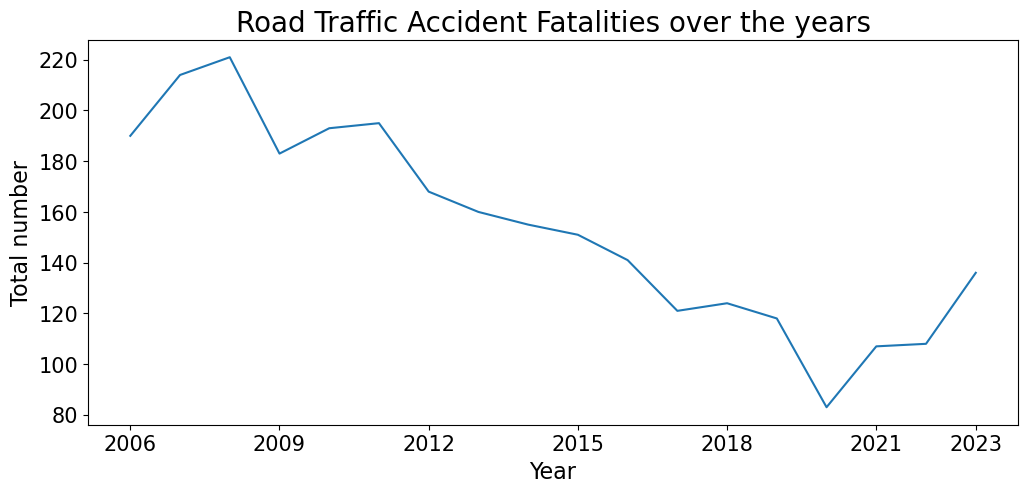

In [45]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_fatal, x='year', y='total')
plt.xlabel("Year", fontsize=16)  # add X-axis label
plt.xticks([2006, 2009, 2012, 2015, 2018, 2021, 2023], fontsize=15)
plt.ylabel("Total number", fontsize=16)  # add Y-axis label
plt.yticks(fontsize=15)
plt.title("Road Traffic Accident Fatalities over the years", fontsize=20)  # add title
plt.show();

From 2011, there was a decreasing trend in the number of fatalities. Then, a sharp drop from 2019 to 2020, most likely due to the COVID-19 measures where traffic volumes decreased as well. After COVID-19 measures were lifted in 2021-2022, the number of fatalities is going on an increasing trend until now.

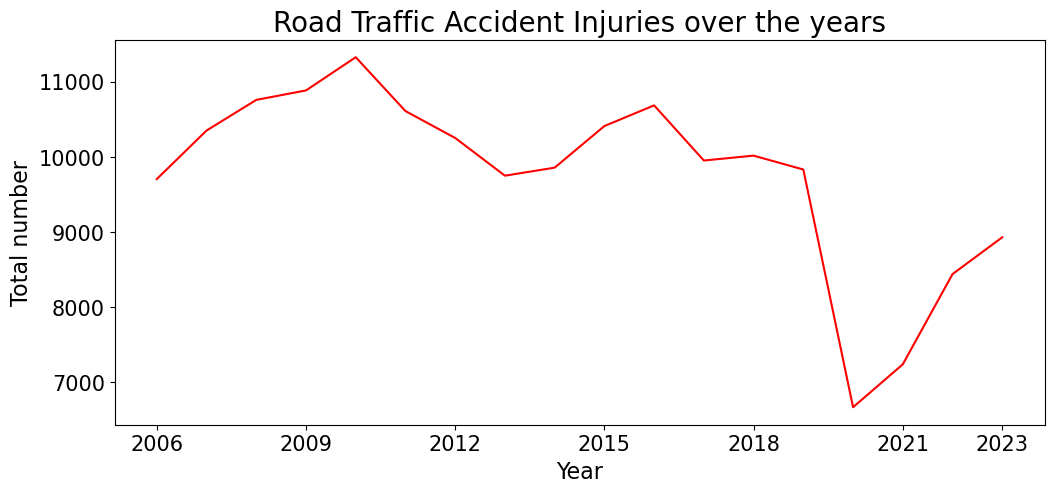

In [46]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_inj, x='year', y='total', color='r')
plt.xlabel("Year", fontsize=16)  # add X-axis label
plt.xticks([2006, 2009, 2012, 2015, 2018, 2021, 2023], fontsize=15)
plt.ylabel("Total number", fontsize=16)  # add Y-axis label
plt.yticks(fontsize=15)
plt.title("Road Traffic Accident Injuries over the years", fontsize=20)  # add title
plt.show();

2010 recorded the highest number of accident injuries of more than 11,000. Then, there was a decreasing trend in the number of injuries, followed by a constant increase from 2013 to 2016, followed by some fluctuations. There was a sharp drop from 2019 to 2020, most likely due to the COVID-19 measures where traffic volumes decreased as well. After COVID-19 measures were lifted in 2021-2022, the number of injuries is going on an increasing trend until now. Thus, we should anticipate the numbers to be high in the next few years as well.

Next we will plot boxplots for fatalities and injuries per road user.

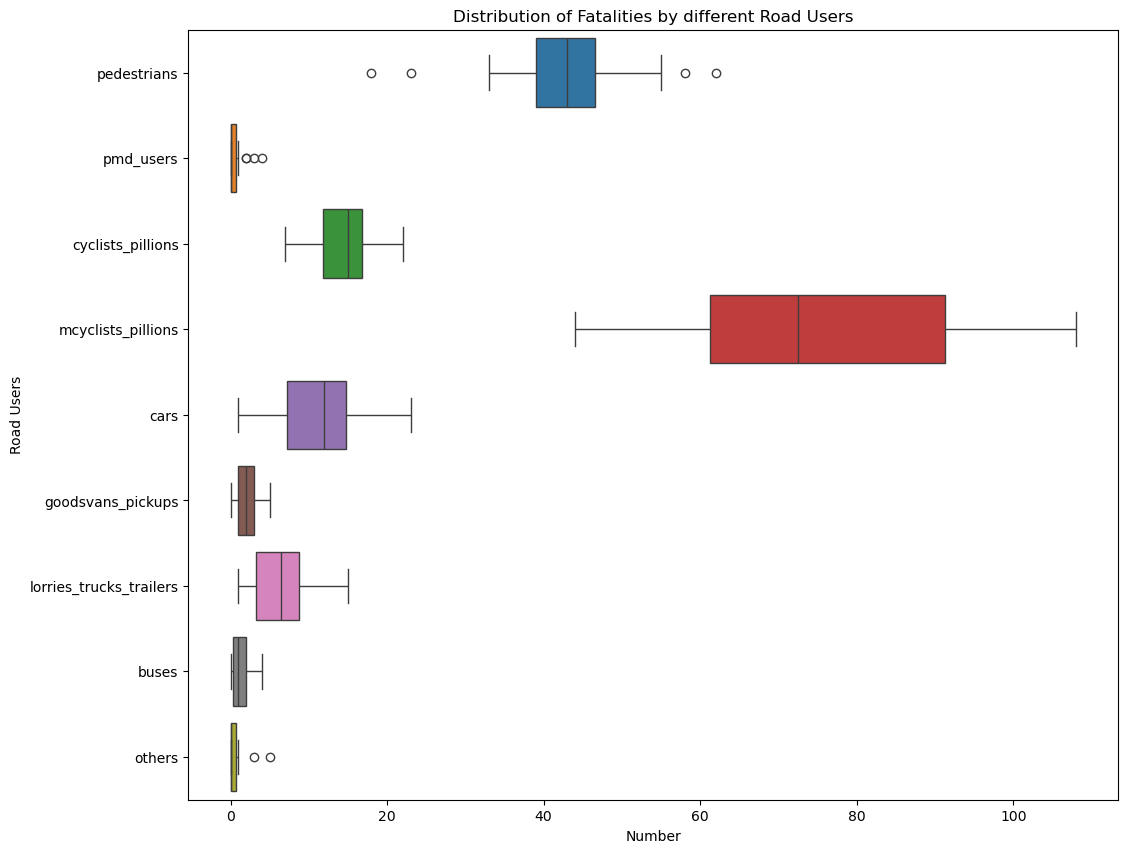

In [28]:
# plot boxplots for number of fatalities per road user
plt.figure(figsize=(12, 10))
sns.boxplot(df_fatal.drop(columns=['year','total']), orient='h')
plt.xlabel('Number')  # Set the x-axis label
plt.ylabel('Road Users')  # Set the y-axis label 
plt.title('Distribution of Fatalities by different Road Users')  # Set the title
plt.show()

From the boxplots above, we can see that `mcyclists_pillions` has the largest spread in the number of fatalities, followed by `pedestrians` and `cars`. In every year, there are at least 40 fatalities from motorcyclists and pillions. There are four anomalies in the `pedestrian` boxplot.

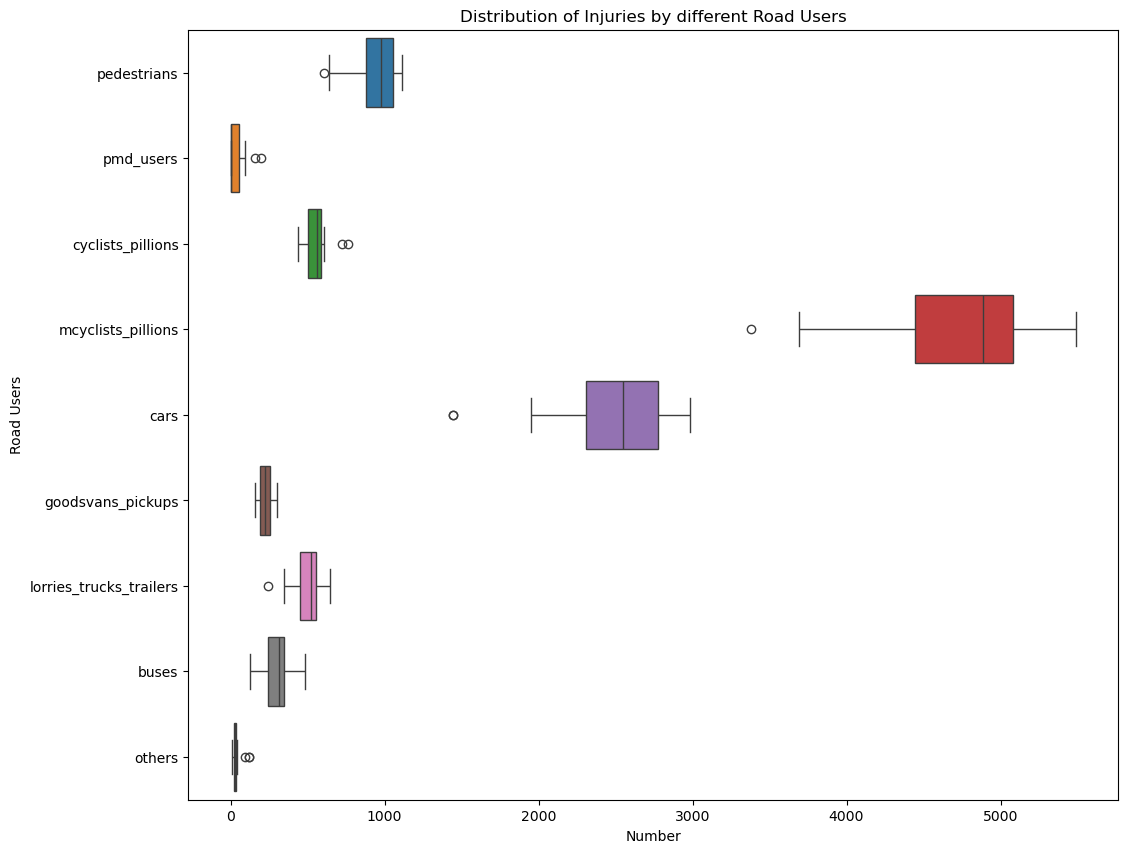

In [29]:
# plot boxplots for number of injuries per road user
plt.figure(figsize=(12, 10))
sns.boxplot(df_inj.drop(columns=['year','total']), orient='h')
plt.xlabel('Number')  # Set the x-axis label
plt.ylabel('Road Users')  # Set the y-axis label 
plt.title('Distribution of Injuries by different Road Users')  # Set the title
plt.show()

From the boxplots above, we can see that `mcyclists_pillions` has the largest spread in the number of injuries, followed by `cars` and `pedestrians`. In every year, there are at least 3000 injuries from motorcyclists and pillions and at least 1000 injuries from car drivers and passengers.

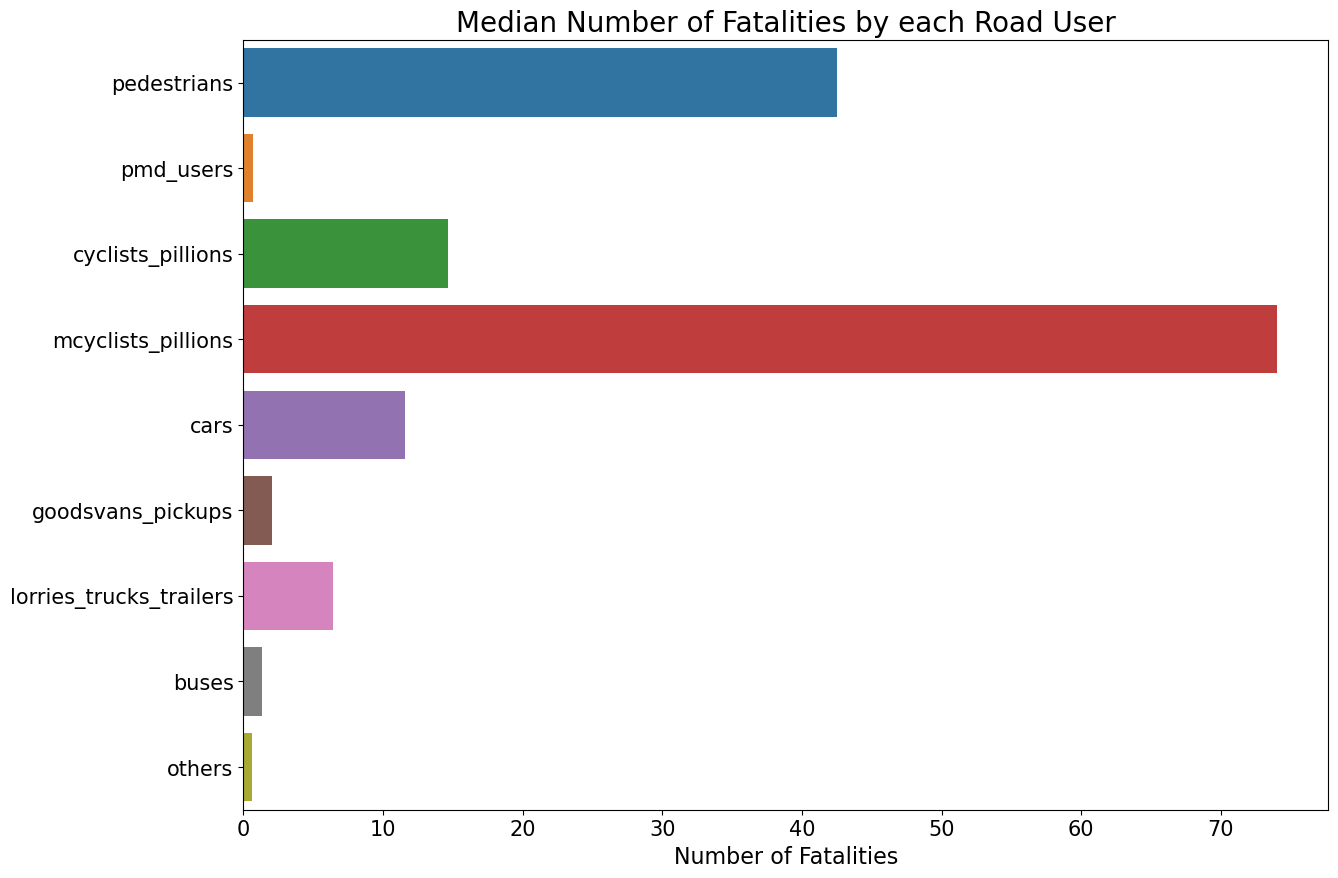

In [30]:
# plot number of fatalities by road user
plt.figure(figsize=(14,10))
sns.barplot(df_fatal.drop(columns=['year','total']), orient='h', errorbar=None)
plt.title('Median Number of Fatalities by each Road User', fontsize=20)
plt.xlabel('Number of Fatalities', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

From the bar plot above, we can see that `mcyclists_pillions` has the largest median number of fatalities, followed by `pedestrians` and `cyclists_pillions`. This shows that two-wheeled vehicles are the most vulnerable in road traffic accidents.

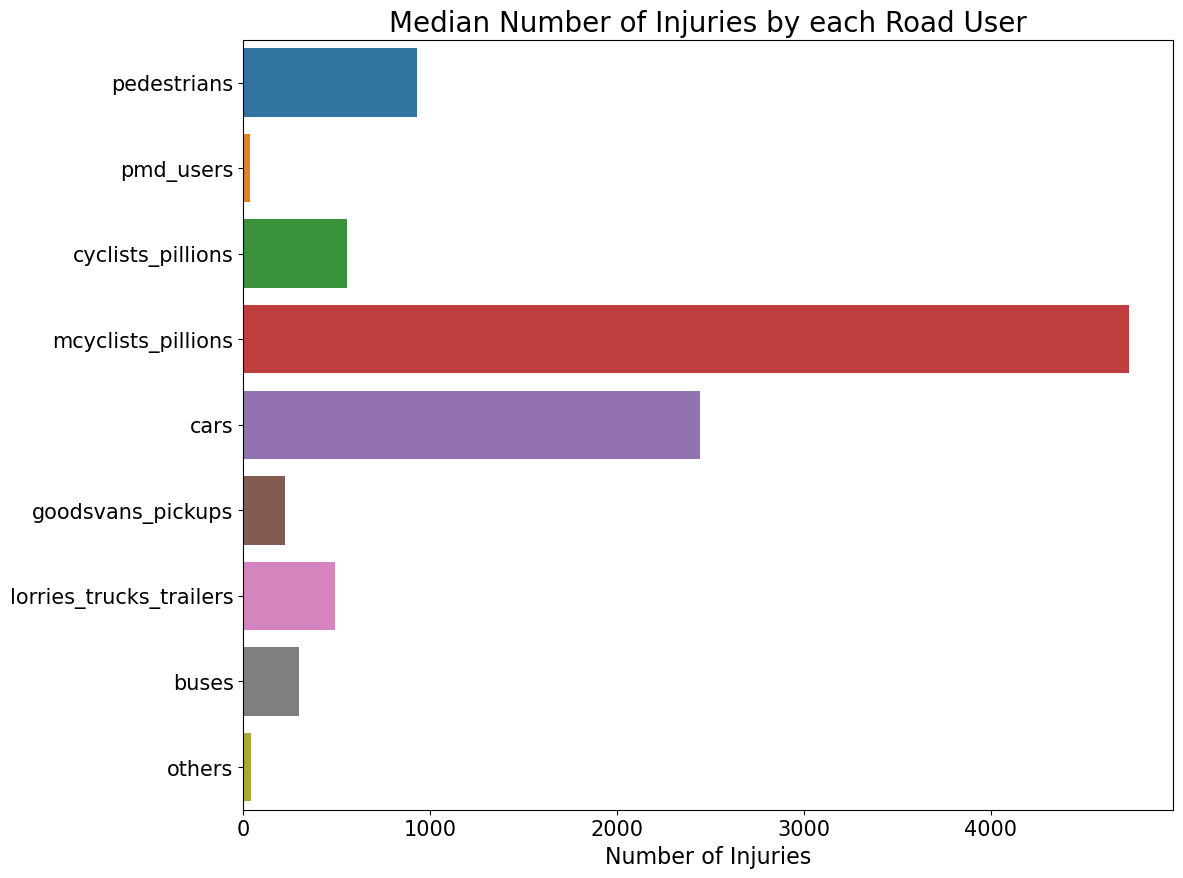

In [40]:
# plot number of Injuries by road user
plt.figure(figsize=(12,10))
sns.barplot(df_inj.drop(columns=['year','total']), orient='h', errorbar=None)
plt.title('Median Number of Injuries by each Road User', fontsize=20)
plt.xlabel('Number of Injuries', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

From the bar plot above, we can see that `mcyclists_pillions` has the largest median number of injuries, followed by `cars` and `pedestrians`. This may be due to cars, motorcycles and pedestrians being generally the most frequent road users.

In summary, since both the number of fatalities and injuries has been on an increasing trend for the last four years, we should put more attention into analysing and trying to improve the land transport industry. With that, we have decided on our problem statement, which leverages on image classification techniques to classify the severity of accidents. The image dataset we have chosen will be discussed in the next section.

# 7. Image Dataset Information

In this section, we will generate a dataframe for our images using OS directory data paths. Then, we will gather information on this image dataset.

In [32]:
# Generate data paths with labels
data_dir = '../datasets/severity_acc'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [33]:
# show first 5 columns
df.head()

,filepaths,labels
0,../datasets/severity_acc\fire\images_142--3-_j...,fire
1,../datasets/severity_acc\fire\images_143--2-_j...,fire
2,../datasets/severity_acc\fire\images_146_jpg.r...,fire
3,../datasets/severity_acc\fire\images_147--2-_j...,fire
4,../datasets/severity_acc\fire\images_147_jpg.r...,fire


In [34]:
# show columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  811 non-null    object
 1   labels     811 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB


There are a total of 811 images in our dataset to be split into train and valid in the next notebook.

In [35]:
# show unique labels
df['labels'].unique()

array(['fire', 'minor', 'moderate', 'no_acc', 'severe'], dtype=object)

There are five labels, indicated as 5 separate folders in our directory.

In [36]:
print(f"There are {df[df['labels']=='fire']['labels'].count()} fire accident images.")
print(f"There are {df[df['labels']=='minor']['labels'].count()} minor accident images.")
print(f"There are {df[df['labels']=='moderate']['labels'].count()} moderate accident images.")
print(f"There are {df[df['labels']=='no_acc']['labels'].count()} no accident images.")
print(f"There are {df[df['labels']=='severe']['labels'].count()} severe accident images.")

There are 100 fire accident images.
There are 80 minor accident images.
There are 101 moderate accident images.
There are 380 no accident images.
There are 150 severe accident images.


Lastly, the test image dataset consists of 20 images in each of the 5 classes mentioned above. It will be used in the third notebook.

In the second notebook, we will run our image dataset on various image classification models and compare their performance.